In [67]:
import pandas as pd

In [68]:
data = pd.read_csv('iris.csv')
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


# Data Preprocessing

In [69]:
data.shape #the dimensions of the dataset

(150, 5)

In [70]:
data.info() #information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal.length  150 non-null    float64
 1   sepal.width   150 non-null    float64
 2   petal.length  150 non-null    float64
 3   petal.width   150 non-null    float64
 4   variety       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [71]:
data.isnull().sum().sum() #their is no missing value

0

In [72]:
data.describe() #describtion about columns and their values

,sepal.length,sepal.width,petal.length,petal.width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# Data visualisation 

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns

<AxesSubplot:xlabel='variety', ylabel='count'>

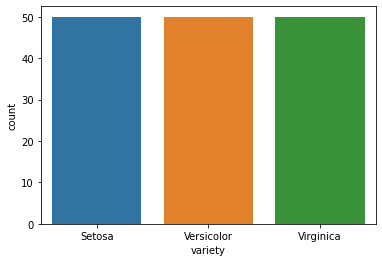

In [74]:
sns.countplot(x='variety',data=data)


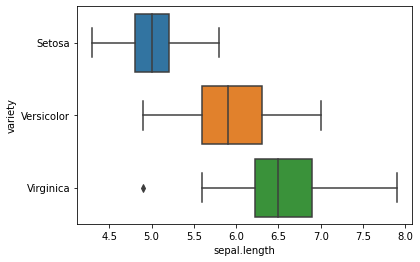

In [83]:
ax = sns.boxplot(x="sepal.length", y="variety", data=data)

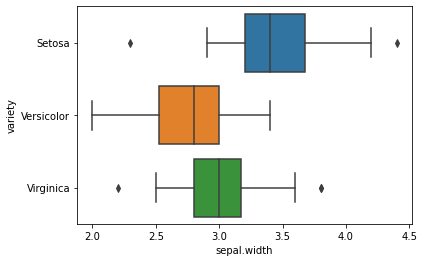

In [84]:
ax = sns.boxplot(x="sepal.width", y="variety", data=data)

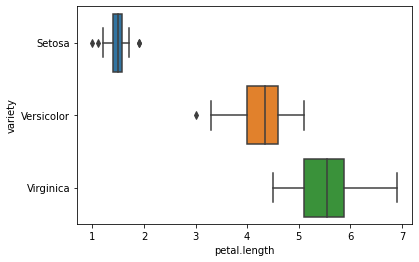

In [85]:
ax = sns.boxplot(x="petal.length", y="variety", data=data)

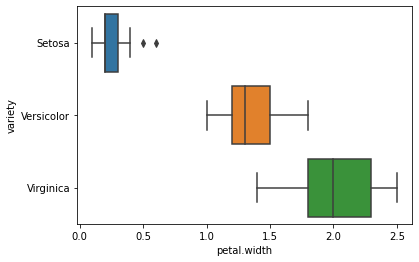

In [86]:
ax = sns.boxplot(x="petal.width", y="variety", data=data)

In [76]:
#Converting categorical to numerical so we can use knn
#data['variety']=data['variety'].map({'Setosa':0,'Versicolor':1,'Virginica':2})

#Choosing the features as x and the target as y
x=data[['sepal.length','sepal.width','petal.length','petal.width']]
y=data['variety']
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


# Optimal K Value

In [77]:
n_neighbors=30
scores=[]
for k in range(1,30):
    knn=KNeighborsClassifier(n_neighbors-k)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    print('Accuracy for k=',k,'is:',round(accuracy_score(y_pred,y_test),2))
    scores.append(round(accuracy_score(y_pred,y_test),2))

Accuracy for k= 1 is: 1.0
Accuracy for k= 2 is: 0.93
Accuracy for k= 3 is: 1.0
Accuracy for k= 4 is: 0.93
Accuracy for k= 5 is: 0.97
Accuracy for k= 6 is: 0.97
Accuracy for k= 7 is: 1.0
Accuracy for k= 8 is: 0.97
Accuracy for k= 9 is: 1.0
Accuracy for k= 10 is: 0.97
Accuracy for k= 11 is: 1.0
Accuracy for k= 12 is: 1.0
Accuracy for k= 13 is: 1.0
Accuracy for k= 14 is: 1.0
Accuracy for k= 15 is: 1.0
Accuracy for k= 16 is: 1.0
Accuracy for k= 17 is: 1.0
Accuracy for k= 18 is: 1.0
Accuracy for k= 19 is: 1.0
Accuracy for k= 20 is: 0.97
Accuracy for k= 21 is: 1.0
Accuracy for k= 22 is: 0.97
Accuracy for k= 23 is: 0.97
Accuracy for k= 24 is: 0.93
Accuracy for k= 25 is: 0.93
Accuracy for k= 26 is: 0.9
Accuracy for k= 27 is: 0.93
Accuracy for k= 28 is: 0.93
Accuracy for k= 29 is: 0.9


Text(0, 0.5, 'Testing Accuracy')

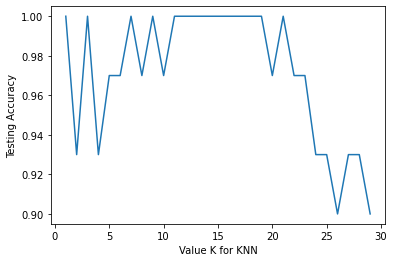

In [78]:
plt.plot(range(1,30),scores)
plt.xlabel('Value K for KNN')
plt.ylabel('Testing Accuracy')


# Knn Code

In [79]:
#import the relevant libraries
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=30) #split our data with test size of 20% 

knn=KNeighborsClassifier(n_neighbors=21) #build our knn classifier
knn.fit(x_train,y_train) #Training KNN classifier
y_pred=knn.predict(x_test)  #Testing
print('Acuuracy=',accuracy_score(y_pred,y_test))

Acuuracy= 1.0


<AxesSubplot:xlabel='variety', ylabel='Actual'>

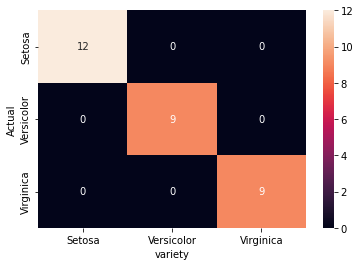

In [80]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['variety'])
sns.heatmap(confusion_matrix, annot=True)

## We obtain accuracu of 100%